In [35]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

def normalise(df):
    return (df - df.min()) / (df.max() - df.min())

df = pd.read_csv("data/new_daily_cases.csv")
df = df.drop([0])
df = normalise(df)

X = np.column_stack((np.array(df['ConfirmedCovidCases']), np.array(df['HospitalisedCovidCases']), np.array(df['RequiringICUCovidCases'])))
#X = np.array(df['HospitalisedCovidCases']).reshape(-1, 1)
y = np.array(df['HealthcareWorkersCovidCases'])


### Cross-validation


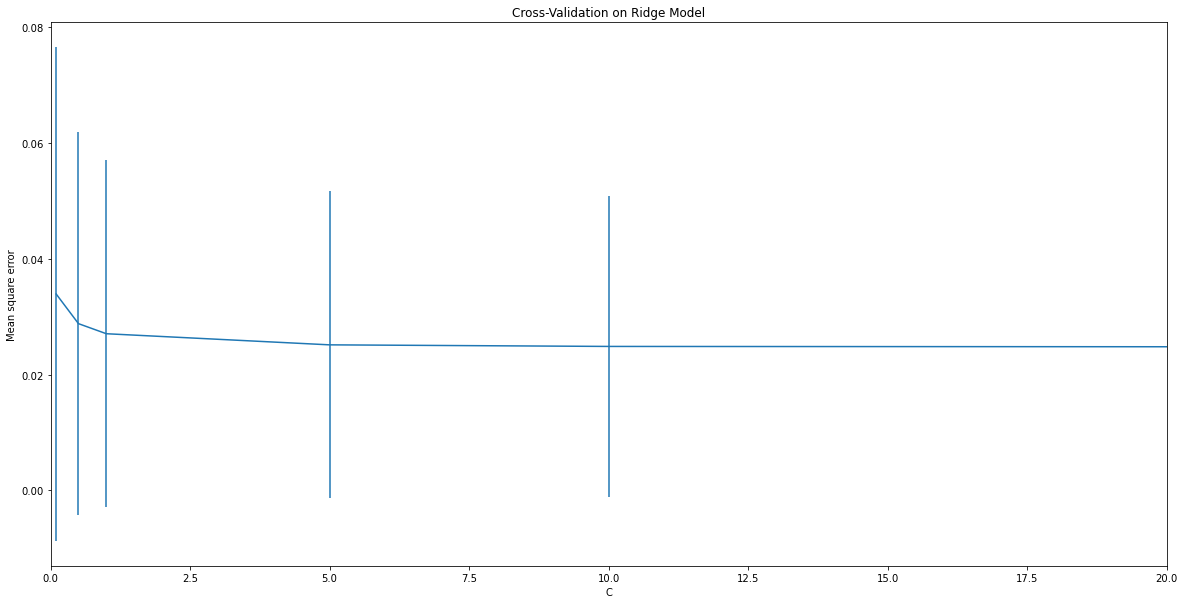

In [37]:
mean_error = []; std_error = []
C_range = [0.1, 0.5, 1, 5, 10, 50, 100]
for C in C_range:
    model = Ridge(alpha = 1/(2 * C))
    temp = []
    kf = KFold(n_splits = 5)
    for train, test in kf.split(X):
        model.fit(X[train], y[train])
        ypred = model.predict(X[test])
        temp.append(mean_squared_error(y[test], ypred))
    mean_error.append(np.array(temp).mean())
    std_error.append(np.array(temp).std())
fig = plt.figure(figsize=(20, 10))
plt.errorbar(Ci_range,mean_error,yerr=std_error)
plt.title('Cross-Validation on Ridge Model')
plt.xlabel('C'); plt.ylabel('Mean square error')
plt.xlim((0, 20))
plt.show()

### Ridge Regression Model

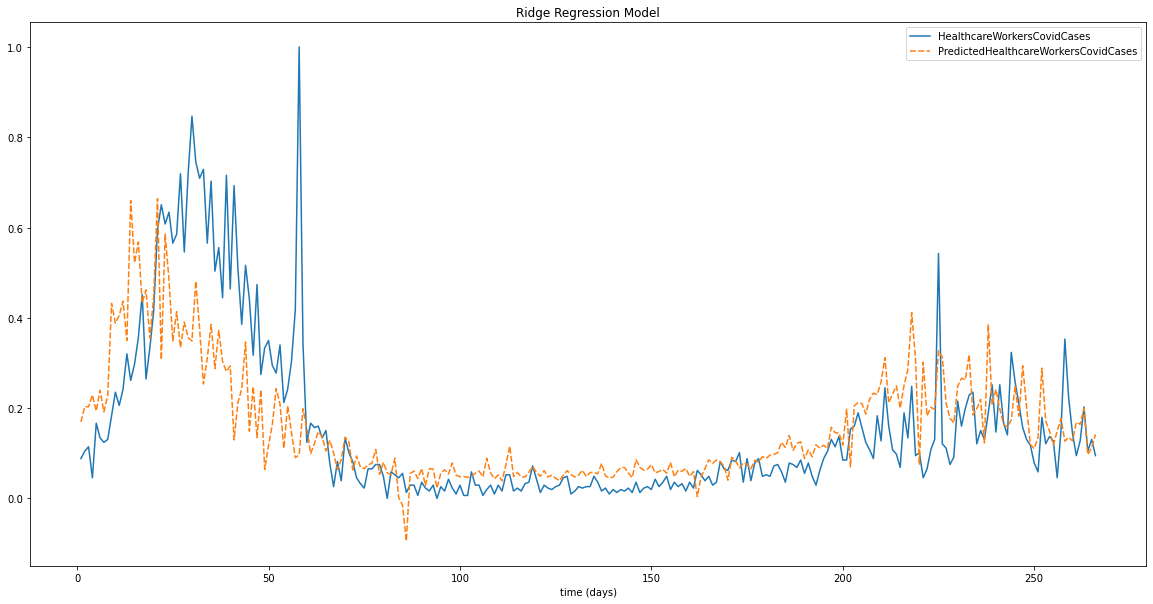

In [18]:
#C=10 looks best from error bar
C = 10
model2 = Ridge(alpha = 1/(2 * C))
model2.fit(X, y)

y_pred2 = model2.predict(X)

df_new2 = pd.DataFrame()
df_new2['HealthcareWorkersCovidCases'] = df['HealthcareWorkersCovidCases']
df_new2['PredictedHealthcareWorkersCovidCases'] = y_pred2

fig = plt.figure(figsize=(20, 10))
sns.lineplot(data=df_new2)
plt.title('Ridge Regression Model')
plt.legend()
plt.xlabel('time (days)')
plt.show()


### Baseline 


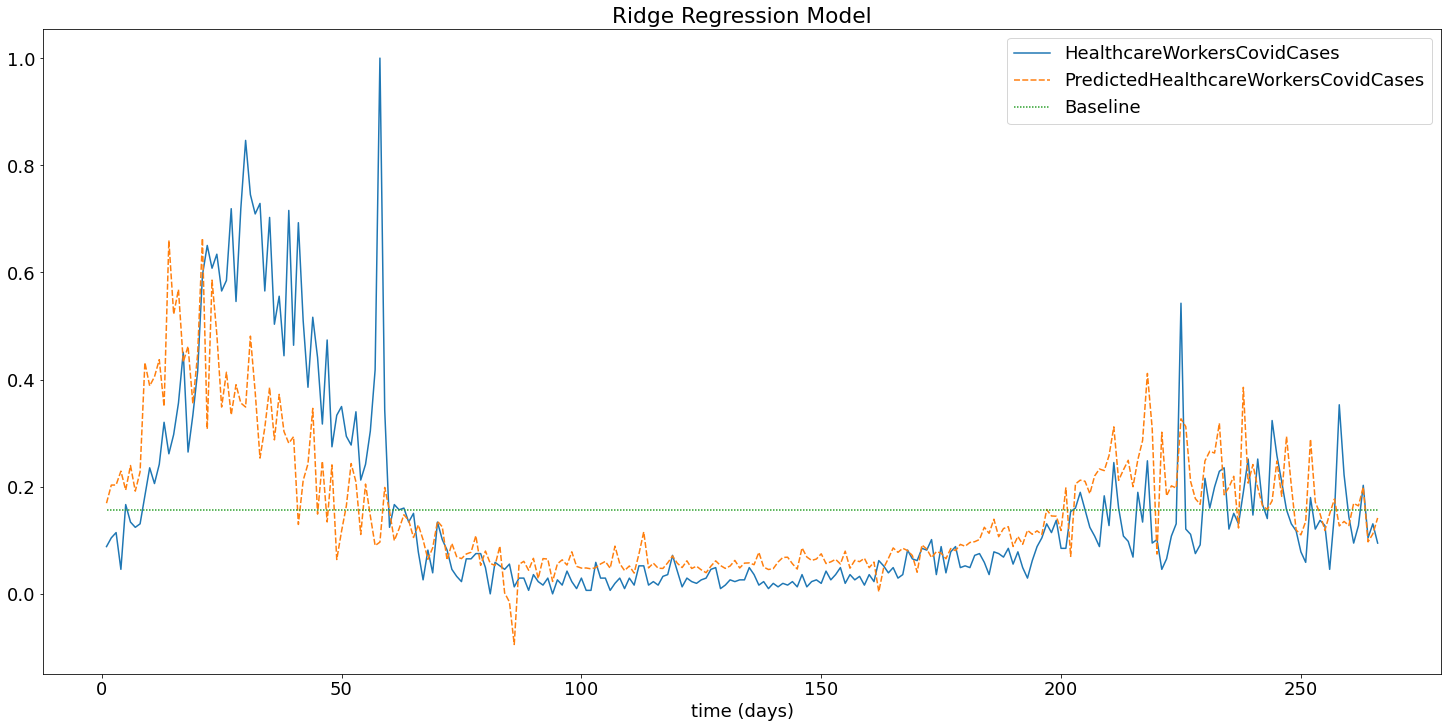


Baseline:
ridge mse: 0.018412852668745563
dummy mse: 0.034109272529946326


In [56]:
#C=10 looks best from error bar
C = 10
model2 = Ridge(alpha = 1/(2 * C))
model2.fit(X, y)

y_pred2 = model2.predict(X)

from sklearn.dummy import DummyRegressor
dummy = DummyRegressor(strategy="mean")
dummy.fit(X, y)
ydummy = dummy.predict(X)

df_new2 = pd.DataFrame()
df_new2['HealthcareWorkersCovidCases'] = df['HealthcareWorkersCovidCases']
df_new2['PredictedHealthcareWorkersCovidCases'] = y_pred2
df_new2['Baseline'] = ydummy

fig = plt.figure(figsize=(20, 10))
sns.lineplot(data=df_new2)
plt.title('Ridge Regression Model')
plt.legend()
plt.xlabel('time (days)')
plt.show()

#baseline
print("\nBaseline:")

#from sklearn.model_selection import train_test_split
#Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2)

#y_pred = model2.predict(Xtest)

#from sklearn.dummy import DummyRegressor
#dummy = DummyRegressor(strategy="mean")
#dummy.fit(Xtrain, ytrain)
#ydummy = dummy.predict(Xtest)

print("ridge mse:", mean_squared_error(y, y_pred2))
print("dummy mse:", mean_squared_error(y, ydummy))
